In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Reshape, LSTM, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from prettytable import PrettyTable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from prettytable import PrettyTable
import gc
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from prettytable import PrettyTable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from prettytable import PrettyTable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Reshape, LSTM, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#SALİH CAN AYDOĞDU
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
clinical_text_df = pd.read_csv("/content/drive/MyDrive/mtsamples.csv")
print(clinical_text_df.columns)
clinical_text_df.head(5)

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1
    word_count = len(vocab.keys())
    return sent_count,word_count


In [5]:
import nltk
nltk.download('punkt')
clinical_text_df = clinical_text_df[clinical_text_df['transcription'].notna()]
sent_count,word_count= get_sentence_word_count(clinical_text_df['transcription'].tolist())
print("Number of sentences in transcriptions column: "+ str(sent_count))
print("Number of unique words in transcriptions column: "+str(word_count))



data_categories  = clinical_text_df.groupby(clinical_text_df['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of sentences in transcriptions column: 140235
Number of unique words in transcriptions column: 35805
===========Original Categories =======================
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 371
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 96
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 224
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 155
Cat:26  Office Notes : 50
Cat:27  Ophthalmology : 83
Cat:28  Orthoped

In [6]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  Discharge Summary : 108
Cat:4  ENT - Otolaryngology : 96
Cat:5  Emergency Room Reports : 75
Cat:6  Gastroenterology : 224
Cat:7  General Medicine : 259
Cat:8  Hematology - Oncology : 90
Cat:9  Nephrology : 81
Cat:10  Neurology : 223
Cat:11  Neurosurgery : 94
Cat:12  Obstetrics / Gynecology : 155
Cat:13  Ophthalmology : 83
Cat:14  Orthopedic : 355
Cat:15  Pain Management : 61
Cat:16  Pediatrics - Neonatal : 70
Cat:17  Psychiatry / Psychology : 53
Cat:18  Radiology : 273
Cat:19  SOAP / Chart / Progress Notes : 166
Cat:20  Surgery : 1088
Cat:21  Urology : 156
============ Reduced Categories ======================


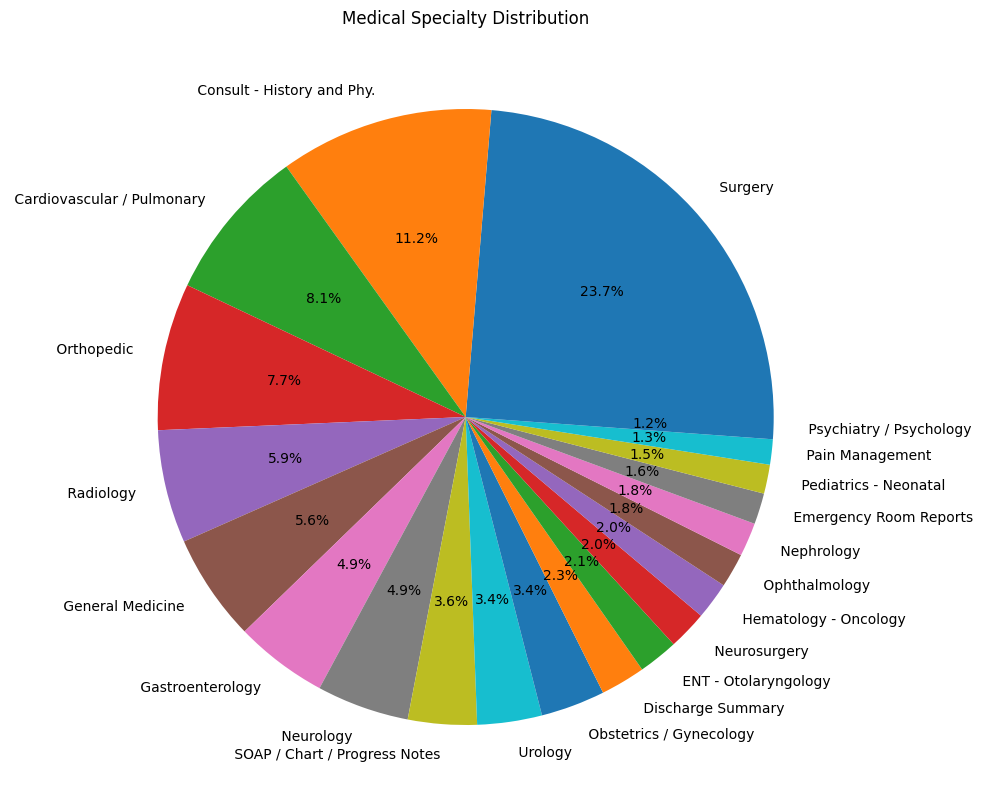

In [7]:
plt.figure(figsize=(10, 10))
filtered_data_categories['medical_specialty'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Medical Specialty Distribution')
plt.ylabel('')  # Y ekseni etiketini kaldırmak için
plt.show()

In [8]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(4597, 2)

In [9]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')

Sample Transcription 1:CC:, Confusion and slurred speech.,HX , (primarily obtained from boyfriend): This 31 y/o RHF experienced a "flu-like illness 6-8 weeks prior to presentation. 3-4 weeks prior to presentation, she was found "passed out" in bed, and when awoken appeared confused, and lethargic. She apparently recovered within 24 hours. For two weeks prior to presentation she demonstrated emotional lability, uncharacteristic of her ( outbursts of anger and inappropriate laughter). She left a stove on.,She began slurring her speech 2 days prior to admission. On the day of presentation she developed right facial weakness and began stumbling to the right. She denied any associated headache, nausea, vomiting, fever, chills, neck stiffness or visual change. There was no history of illicit drug/ETOH use or head trauma.,PMH:, Migraine Headache.,FHX: , Unremarkable.,SHX: ,Divorced. Lives with boyfriend. 3 children alive and well. Denied tobacco/illicit drug use. Rarely consumes ETOH.,ROS:, I

In [10]:
def clean_text(text ):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()])
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)

    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)


In [11]:
import nltk

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [14]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')

Sample Transcription 1:cc   confusion and slurred speech  hx   primarily obtained from boyfriend   this  yo rhf experienced a  flulike illness  week prior to presentation  obgyn exam including cervical biopsy  and abdominalpelvic ct scanning revealed stage iv squamous cell cancer of the cervix 



In [15]:
"""
#tfIdfMat matrisi belge koleksiyonundaki belgelerin TF-IDF temsilini içerir ve feature_names içindeki terim isimleri matristeki sütunlara karşılık gelir.
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names_out())
print(feature_names)

feature_names, vektörleme sırasında kullanılan terimlerin sıralanmış listesini içerir.
tfIdfMat, belge koleksiyonundaki her bir belge için TF-IDF temsilini içeren bir matristir. Her bir satır, bir belgeyi temsil eder ve her bir sütun, feature_names listesindeki bir terimi temsil eder.
Yani, tfIdfMat[i, j] ifadesi, koleksiyondaki i. belgenin j. teriminin TF-IDF skorunu içerir.
Bu şekilde, feature_names ile tfIdfMat arasında, her bir sütunun bir terimi temsil ettiği ve matristeki değerlerin TF-IDF skorlarını içerdiği bir ilişki bulunmaktadır.
"""


"\n#tfIdfMat matrisi belge koleksiyonundaki belgelerin TF-IDF temsilini içerir ve feature_names içindeki terim isimleri matristeki sütunlara karşılık gelir.\nvectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)\ntfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )\nfeature_names = sorted(vectorizer.get_feature_names_out())\nprint(feature_names)\n\nfeature_names, vektörleme sırasında kullanılan terimlerin sıralanmış listesini içerir.\ntfIdfMat, belge koleksiyonundaki her bir belge için TF-IDF temsilini içeren bir matristir. Her bir satır, bir belgeyi temsil eder ve her bir sütun, feature_names listesindeki bir terimi temsil eder.\nYani, tfIdfMat[i, j] ifadesi, koleksiyondaki i. belgenin j. teriminin TF-IDF skorunu içerir.\nBu şekilde, feature_names ile tfIdfMat arasında, her bir sütunun bir terimi temsil ettiği ve matristeki değerlerin TF-IDF skorlarını içerdiği bir ilişki bu

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# CountVectorizer kullanarak Bag-of-Words matrisini oluştur
count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1,3), max_df=0.75, max_features=1000)
count_matrix = count_vectorizer.fit_transform(data['transcription'].tolist())

# TF-IDF Transformer'ı kullanarak CountVectorizer çıktısını TF-IDF matrisine dönüştür
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfIdfMat = tfidf_transformer.fit_transform(count_matrix)

# Feature isimlerini alma
feature_names = count_vectorizer.get_feature_names_out()

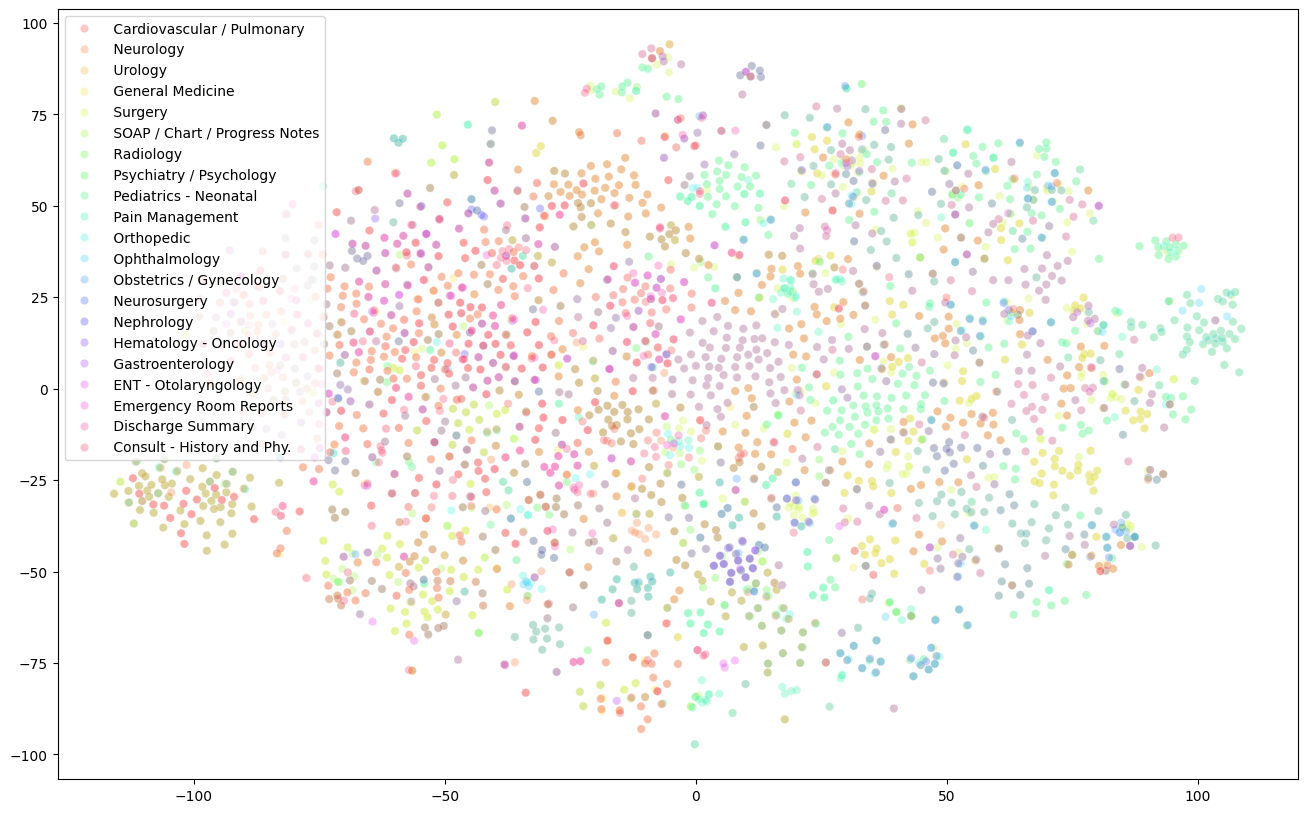

In [17]:
#TF-IDF matrisinden elde edilen özellik vektörlerini iki boyuta indirgeyerek görselleştirmek
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['medical_specialty'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(np.asarray(tfIdfMatrix))
plt.figure(figsize=(16,10))
palette = sns.hls_palette(21, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

In [18]:
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
print(type(labels))

<class 'list'>


In [19]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [20]:
samplers = [SMOTE(random_state=42)]

In [21]:
pip install matplotlib seaborn scikit-learn imbalanced-learn prettytable

In [22]:
#RandomForest
def plot_metrics_comparison_random_forest(X, y, samplers):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Original dataset
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    rf_model_orig = RandomForestClassifier(random_state=42)
    rf_model_orig.fit(X_train_orig, y_train_orig)
    y_pred_orig = rf_model_orig.predict(X_test_orig)

    for category in categories:
        category_mask = y_test_orig == category
        y_pred_category = y_pred_orig[category_mask]

        accuracy_orig = accuracy_score(y_test_orig[category_mask], y_pred_category)
        precision_orig = precision_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        recall_orig = recall_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        f1_orig = f1_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

        metrics_values['Accuracy'][category].append(accuracy_orig)
        metrics_values['Precision'][category].append(precision_orig)
        metrics_values['Recall'][category].append(recall_orig)
        metrics_values['F1 Score'][category].append(f1_orig)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Original')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    for sampler in samplers:
        X_resampled, y_resampled = sampler.fit_resample(X, y_encoded)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        for category in categories:
            category_mask = y_test == category
            y_pred_category = y_pred[category_mask]

            accuracy = accuracy_score(y_test[category_mask], y_pred_category)
            precision = precision_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            recall = recall_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            f1 = f1_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

            metrics_values['Accuracy'][category].append(accuracy)
            metrics_values['Precision'][category].append(precision)
            metrics_values['Recall'][category].append(recall)
            metrics_values['F1 Score'][category].append(f1)

        # Confusion Matrix for Resampled dataset
        cm_resampled = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
        plt.title(f'Confusion Matrix - {sampler.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Sampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        for sampler, accuracy, precision, recall, f1 in zip(['Original'] + [sampler.__class__.__name__ for sampler in samplers],
                                                          metrics_values['Accuracy'][category], metrics_values['Precision'][category],
                                                          metrics_values['Recall'][category], metrics_values['F1 Score'][category]):
            table.add_row([label_encoder.inverse_transform([category])[0], sampler, accuracy, precision, recall, f1])

    print(table)

In [23]:
pip install prettytable matplotlib seaborn

In [24]:
#Negatif değerler sifira donusturduk, aksi halde naive bayes calismiyor
#Naive pek uygun bir classification yöntemi değil bu dataset classificaiton için!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import *  # Import oversampling techniques from imbalanced-learn
from prettytable import PrettyTable
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

def plot_metrics_comparison_naive_bayes(X, y, samplers):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Original dataset
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Negatif değerleri kontrol et ve sıfıra dönüştür
    X_train_orig[X_train_orig < 0] = 0
    X_test_orig[X_test_orig < 0] = 0

    nb_model_orig = MultinomialNB()
    nb_model_orig.fit(X_train_orig, y_train_orig)
    y_pred_orig = nb_model_orig.predict(X_test_orig)

    for category in categories:
        category_mask = y_test_orig == category
        y_pred_category = y_pred_orig[category_mask]

        accuracy_orig = accuracy_score(y_test_orig[category_mask], y_pred_category)
        precision_orig = precision_score(y_test_orig[category_mask], y_pred_category, average='weighted', zero_division=1)
        recall_orig = recall_score(y_test_orig[category_mask], y_pred_category, average='weighted', zero_division=1)
        f1_orig = f1_score(y_test_orig[category_mask], y_pred_category, average='weighted', zero_division=1)

        metrics_values['Accuracy'][category].append(accuracy_orig)
        metrics_values['Precision'][category].append(precision_orig)
        metrics_values['Recall'][category].append(recall_orig)
        metrics_values['F1 Score'][category].append(f1_orig)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Original')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    for sampler in samplers:
        X_resampled, y_resampled = sampler.fit_resample(X, y_encoded)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Negatif değerleri kontrol et ve sıfıra dönüştür
        X_train[X_train < 0] = 0
        X_test[X_test < 0] = 0

        nb_model = MultinomialNB()

        # Cross-validation scores
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        try:
            cross_val_scores = cross_val_score(nb_model, X_resampled, y_resampled, cv=cv, scoring='precision_weighted')
            print(f"Cross-Validation Precision Scores for {sampler.__class__.__name__}: {cross_val_scores}")
            print(f"Mean Cross-Validation Precision Score: {np.mean(cross_val_scores)}")
        except Exception as e:
            print(f"Cross-validation failed for {sampler.__class__.__name__}: {str(e)}")

        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_test)

        for category in categories:
            category_mask = y_test == category
            y_pred_category = y_pred[category_mask]

            accuracy = accuracy_score(y_test[category_mask], y_pred_category)
            precision = precision_score(y_test[category_mask], y_pred_category, average='weighted', zero_division=1)
            recall = recall_score(y_test[category_mask], y_pred_category, average='weighted', zero_division=1)
            f1 = f1_score(y_test[category_mask], y_pred_category, average='weighted', zero_division=1)

            metrics_values['Accuracy'][category].append(accuracy)
            metrics_values['Precision'][category].append(precision)
            metrics_values['Recall'][category].append(recall)
            metrics_values['F1 Score'][category].append(f1)

        # Confusion Matrix for Resampled dataset
        cm_resampled = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
        plt.title(f'Confusion Matrix - {sampler.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Sampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        for sampler, accuracy, precision, recall, f1 in zip(['Original'] + [sampler.__class__.__name__ for sampler in samplers],
                                                          metrics_values['Accuracy'][category], metrics_values['Precision'][category],
                                                          metrics_values['Recall'][category], metrics_values['F1 Score'][category]):
            table.add_row([label_encoder.inverse_transform([category])[0], sampler, accuracy, precision, recall, f1])

    print(table)

In [25]:
#XGBoost Classification
def plot_metrics_comparison_xgboost(X, y, samplers):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Original dataset
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    xgb_model_orig = XGBClassifier(random_state=42)
    xgb_model_orig.fit(X_train_orig, y_train_orig)
    y_pred_orig = xgb_model_orig.predict(X_test_orig)

    for category in categories:
        category_mask = y_test_orig == category
        y_pred_category = y_pred_orig[category_mask]

        accuracy_orig = accuracy_score(y_test_orig[category_mask], y_pred_category)
        precision_orig = precision_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        recall_orig = recall_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        f1_orig = f1_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

        metrics_values['Accuracy'][category].append(accuracy_orig)
        metrics_values['Precision'][category].append(precision_orig)
        metrics_values['Recall'][category].append(recall_orig)
        metrics_values['F1 Score'][category].append(f1_orig)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Original')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    for sampler in samplers:
        X_resampled, y_resampled = sampler.fit_resample(X, y_encoded)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        xgb_model = XGBClassifier(random_state=42)
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)

        for category in categories:
            category_mask = y_test == category
            y_pred_category = y_pred[category_mask]

            accuracy = accuracy_score(y_test[category_mask], y_pred_category)
            precision = precision_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            recall = recall_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            f1 = f1_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

            metrics_values['Accuracy'][category].append(accuracy)
            metrics_values['Precision'][category].append(precision)
            metrics_values['Recall'][category].append(recall)
            metrics_values['F1 Score'][category].append(f1)

        # Confusion Matrix for Resampled dataset
        cm_resampled = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
        plt.title(f'Confusion Matrix - {sampler.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Sampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        for sampler, accuracy, precision, recall, f1 in zip(['Original'] + [sampler.__class__.__name__ for sampler in samplers],
                                                          metrics_values['Accuracy'][category], metrics_values['Precision'][category],
                                                          metrics_values['Recall'][category], metrics_values['F1 Score'][category]):
            table.add_row([label_encoder.inverse_transform([category])[0], sampler, accuracy, precision, recall, f1])

    print(table)


In [26]:
# Import LGBMClassifier from LightGBM
def plot_metrics_comparison_lightgbm(X, y, samplers):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Original dataset
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    lgbm_model_orig = LGBMClassifier(random_state=42)  # Use LGBMClassifier here
    lgbm_model_orig.fit(X_train_orig, y_train_orig)
    y_pred_orig = lgbm_model_orig.predict(X_test_orig)

    for category in categories:
        category_mask = y_test_orig == category
        y_pred_category = y_pred_orig[category_mask]

        accuracy_orig = accuracy_score(y_test_orig[category_mask], y_pred_category)
        precision_orig = precision_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        recall_orig = recall_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
        f1_orig = f1_score(y_test_orig[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

        metrics_values['Accuracy'][category].append(accuracy_orig)
        metrics_values['Precision'][category].append(precision_orig)
        metrics_values['Recall'][category].append(recall_orig)
        metrics_values['F1 Score'][category].append(f1_orig)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Original')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    for sampler in samplers:
        X_resampled, y_resampled = sampler.fit_resample(X, y_encoded)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        lgbm_model = LGBMClassifier(random_state=42)  # Use LGBMClassifier here
        lgbm_model.fit(X_train, y_train)
        y_pred = lgbm_model.predict(X_test)

        for category in categories:
            category_mask = y_test == category
            y_pred_category = y_pred[category_mask]

            accuracy = accuracy_score(y_test[category_mask], y_pred_category)
            precision = precision_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            recall = recall_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')
            f1 = f1_score(y_test[category_mask], y_pred_category, average='binary' if len(set(y_encoded)) == 2 else 'micro')

            metrics_values['Accuracy'][category].append(accuracy)
            metrics_values['Precision'][category].append(precision)
            metrics_values['Recall'][category].append(recall)
            metrics_values['F1 Score'][category].append(f1)

        # Confusion Matrix for Resampled dataset
        cm_resampled = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
        plt.title(f'Confusion Matrix - {sampler.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Sampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        for sampler, accuracy, precision, recall, f1 in zip(['Original'] + [sampler.__class__.__name__ for sampler in samplers],
                                                          metrics_values['Accuracy'][category], metrics_values['Precision'][category],
                                                          metrics_values['Recall'][category], metrics_values['F1 Score'][category]):
            table.add_row([label_encoder.inverse_transform([category])[0], sampler, accuracy, precision, recall, f1])

    print(table)

In [27]:
def plot_metrics_comparison_deep_learning(X, y, samplers, dropout_rate=0.3, l1_reg=0.01, epochs=30, batch_size=36):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Convert labels to one-hot encoding
    y_encoded_onehot = to_categorical(y_encoded)

    # Build a model with dropout and L1 regularization
    model = Sequential()
    model.add(Embedding(input_dim=len(X), output_dim=50, input_length=X.shape[1]))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu', kernel_regularizer=l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(categories), activation='softmax'))  # Output layer

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
    model.fit(X, y_encoded_onehot, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Evaluate the model on the original dataset
    y_pred = np.argmax(model.predict(X), axis=1)

    for category in categories:
        category_mask = y_encoded == category

        accuracy = accuracy_score(y_encoded[category_mask], y_pred[category_mask])
        precision = precision_score(y_encoded[category_mask], y_pred[category_mask], average='weighted')
        recall = recall_score(y_encoded[category_mask], y_pred[category_mask], average='weighted')
        f1 = f1_score(y_encoded[category_mask], y_pred[category_mask], average='weighted')

        metrics_values['Accuracy'][category].append(accuracy)
        metrics_values['Precision'][category].append(precision)
        metrics_values['Recall'][category].append(recall)
        metrics_values['F1 Score'][category].append(f1)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm = confusion_matrix(y_encoded, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Ensemble')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        table.add_row([label_encoder.inverse_transform([category])[0], 'Ensemble',
                       metrics_values['Accuracy'][category][0],
                       metrics_values['Precision'][category][0],
                       metrics_values['Recall'][category][0],
                       metrics_values['F1 Score'][category][0]])

    print(table)


# Example usage:
# Assuming X and y are your feature matrix and labels, respectively
# and samplers is a list of resampling techniques you want to apply
#plot_metrics_comparison_deep_learning(tfIdfMat_reduced, labels, samplers, dropout_rate=0.3, l1_reg=0.01, epochs=30, batch_size=36)


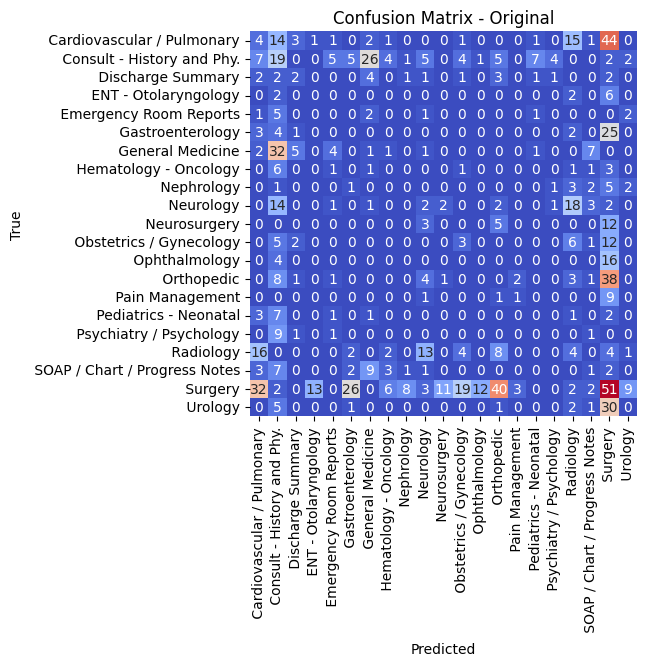

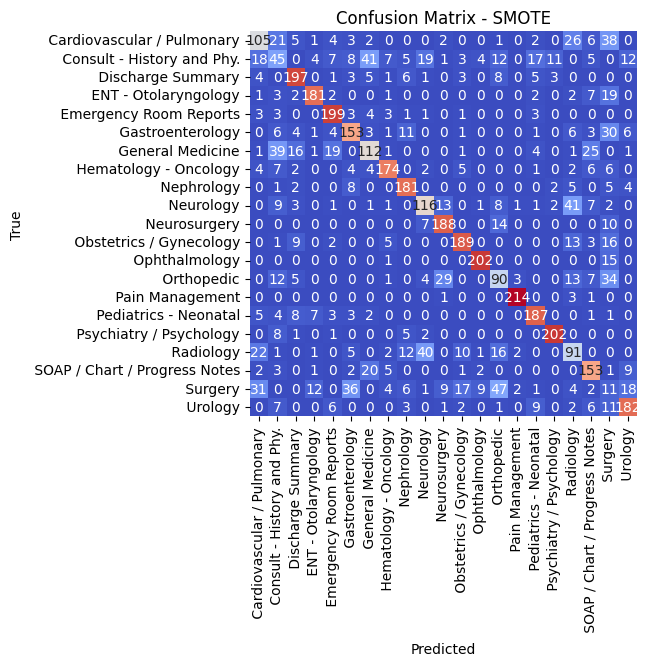

+--------------------------------+----------+----------------------+----------------------+----------------------+----------------------+
|            Category            | Sampler  |       Accuracy       |      Precision       |        Recall        |       F1 Score       |
+--------------------------------+----------+----------------------+----------------------+----------------------+----------------------+
|   Cardiovascular / Pulmonary   | Original | 0.045454545454545456 | 0.045454545454545456 | 0.045454545454545456 | 0.045454545454545456 |
|   Cardiovascular / Pulmonary   |  SMOTE   |  0.4861111111111111  |  0.4861111111111111  |  0.4861111111111111  |  0.4861111111111111  |
|   Consult - History and Phy.   | Original |  0.1958762886597938  |  0.1958762886597938  |  0.1958762886597938  |  0.1958762886597938  |
|   Consult - History and Phy.   |  SMOTE   |  0.2054794520547945  |  0.2054794520547945  |  0.2054794520547945  |  0.2054794520547945  |
|        Discharge Summary       |

In [28]:
plot_metrics_comparison_random_forest(tfIdfMat_reduced, labels, samplers)

In [29]:
"""
The results are quite poor. Let us apply some domain knowledge and see if we can improve the results The surgey category is kind of superset
as there can be surgeries belonging to specializations like cardiology,neurolrogy etc. Similarly
other categories like Emergency Room Reports, Discharge Summary, Notes also overlap with specialities. Hence i remove them."""

'\nThe results are quite poor. Let us apply some domain knowledge and see if we can improve the results The surgey category is kind of superset\nas there can be surgeries belonging to specializations like cardiology,neurolrogy etc. Similarly\nother categories like Emergency Room Reports, Discharge Summary, Notes also overlap with specialities. Hence i remove them.'

In [30]:
filtered_data_categories['medical_specialty'] =filtered_data_categories['medical_specialty'].apply(lambda x:str.strip(x))
mask = filtered_data_categories['medical_specialty'] == 'Surgery'
filtered_data_categories = filtered_data_categories[~mask]
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
mask = filtered_data_categories['medical_specialty'] == 'SOAP / Chart / Progress Notes'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Office Notes'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Consult - History and Phy.'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Emergency Room Reports'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Discharge Summary'
filtered_data_categories = filtered_data_categories[~mask]

'''
mask = filtered_data_categories['medical_specialty'] == 'Pediatrics - Neonatal'
filtered_data_categories = filtered_data_categories[~mask]
'''
mask = filtered_data_categories['medical_specialty'] == 'Pain Management'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'General Medicine'
filtered_data_categories = filtered_data_categories[~mask]


mask = filtered_data_categories['medical_specialty'] == 'Neurosurgery'
filtered_data_categories.loc[mask, 'medical_specialty'] = 'Neurology'
mask = filtered_data_categories['medical_specialty'] == 'Nephrology'
filtered_data_categories.loc[mask, 'medical_specialty'] = 'Urology'


i=1
print('============Reduced Categories======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============Reduced Categories======================')


data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

============Reduced Categories======================
Cat:1 Cardiovascular / Pulmonary : 371
Cat:2 Consult - History and Phy. : 516
Cat:3 Discharge Summary : 108
Cat:4 ENT - Otolaryngology : 96
Cat:5 Emergency Room Reports : 75
Cat:6 Gastroenterology : 224
Cat:7 General Medicine : 259
Cat:8 Hematology - Oncology : 90
Cat:9 Nephrology : 81
Cat:10 Neurology : 223
Cat:11 Neurosurgery : 94
Cat:12 Obstetrics / Gynecology : 155
Cat:13 Ophthalmology : 83
Cat:14 Orthopedic : 355
Cat:15 Pain Management : 61
Cat:16 Pediatrics - Neonatal : 70
Cat:17 Psychiatry / Psychology : 53
Cat:18 Radiology : 273
Cat:19 SOAP / Chart / Progress Notes : 166
Cat:20 Urology : 156
============Reduced Categories======================


(2324, 2)

In [31]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.2.5.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.2.5-py3-none-any.whl size=80006768 sha256=b9234c895c0d4c1e0755b3295ebe8e804e6d04268b7bb68aebd105d8c359c7c7
  Stored in directory: /root/.cache/pip/wheels/3f/48/06/0b10d7df989031301ac11531d0347d0bae25170b78eca0f268
Successfully built en-ner-bionlp13cg-md


In [32]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.5.3.tar.gz

  ERROR: HTTP error 404 while getting https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.5.3.tar.gz
ERROR: Could not install requirement https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.5.3.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.5.3.tar.gz for URL https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bionlp13cg_md-0.5.3.tar.gz


In [33]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bionlp13cg_md-0.5.3.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.3-py3-none-any.whl size=119816876 sha256=44f4651644244bf8ce5243100dd1de7fdb0eb70ccea7609b2ecc0e92edcf9d2b
  Stored in directory: /root/.cache/pip/wheels/57/41/8f/d3506513af9ed67b47f7caed69951922defb753cf3a9e4cbdb
Successfully built en-ner-bionlp13cg-md
  Attempting uninstall: en-ner-bionlp13cg-md
    Found existing installation: en-ner-bionlp13cg-md 0.2.5
    Uninstalling en-ner-bionlp13cg-md-0.2.5:
      Successfully uninstalled en-ner-bionlp13cg-md-0.2.5


In [34]:
import spacy
import en_ner_bionlp13cg_md
nlp = en_ner_bionlp13cg_md.load()

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [35]:
def process_Text( text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)

In [36]:
data['transcription'] = data['transcription'].apply(process_Text)
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [37]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')

Sample Transcription 1:head trauma  pmh rue pronator extremity flexor bilaterally  general gs ua crp ekg subcortical location lacunar infarct edema head arterial fibromuscular dysplasia ana anticardiolipin antibody cardiac enzyme b cholesterol vascular medications  in cervical biopsy squamous cell cancer cervix cervical cancer



In [38]:
"""vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3), max_df=0.75, min_df=5, use_idf=True, smooth_idf=True, sublinear_tf=True, max_features=1000)
tfIdfMat = vectorizer.fit_transform(data['transcription'].tolist())
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
"""

"vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3), max_df=0.75, min_df=5, use_idf=True, smooth_idf=True, sublinear_tf=True, max_features=1000)\ntfIdfMat = vectorizer.fit_transform(data['transcription'].tolist())\nfeature_names = vectorizer.get_feature_names_out()\nprint(feature_names)\n"

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# CountVectorizer kullanarak Bag-of-Words matrisini oluştur
count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1,3), max_df=0.75, max_features=1000)
count_matrix = count_vectorizer.fit_transform(data['transcription'].tolist())

# TF-IDF Transformer'ı kullanarak CountVectorizer çıktısını TF-IDF matrisine dönüştür
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfIdfMat = tfidf_transformer.fit_transform(count_matrix)

# Feature isimlerini alma
feature_names = count_vectorizer.get_feature_names_out()

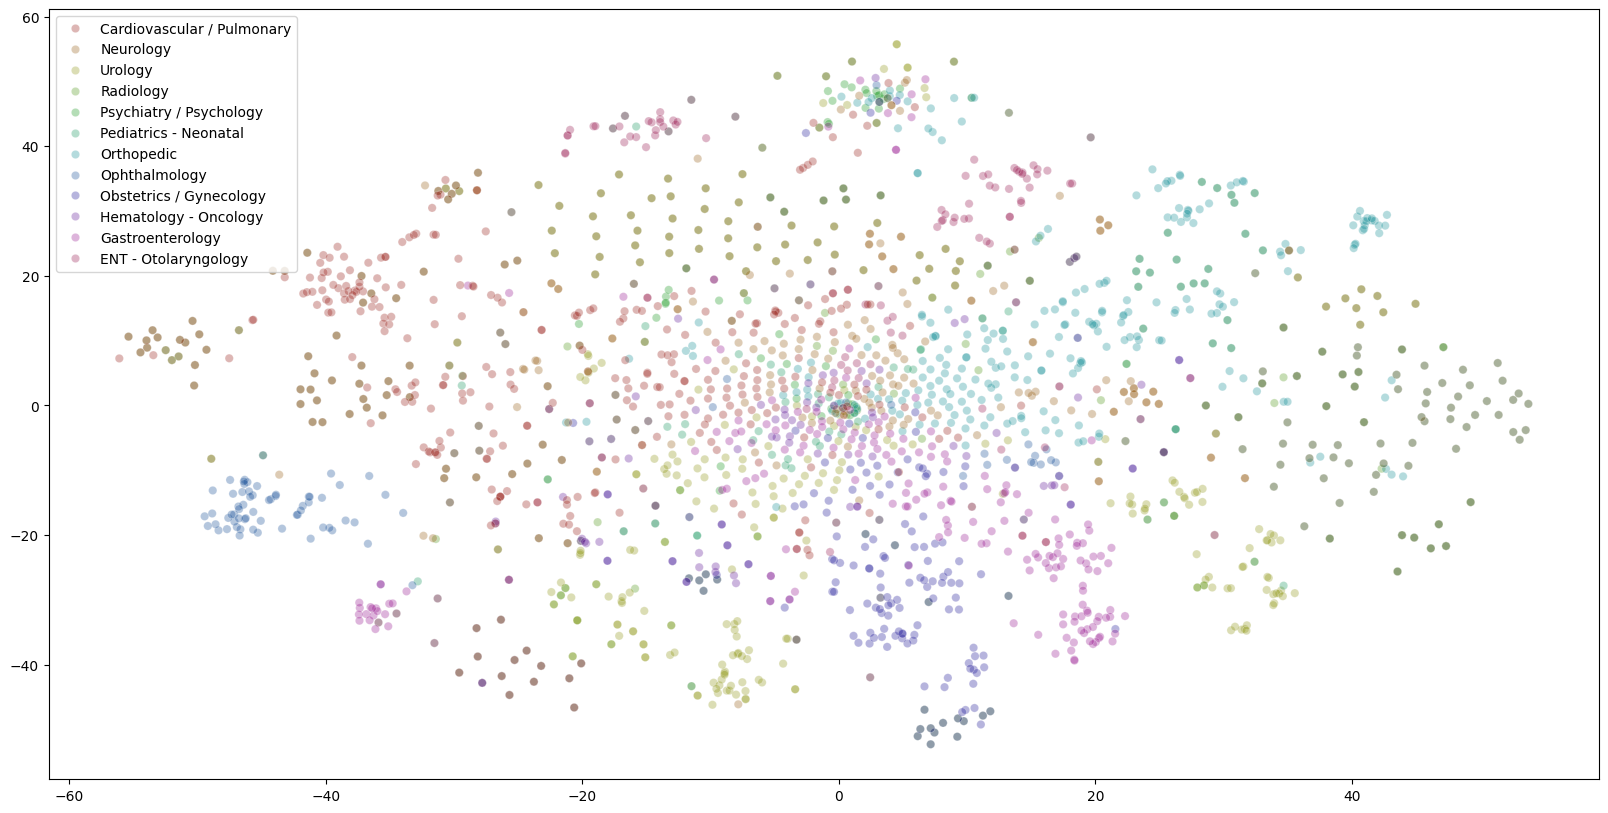

In [40]:
import gc
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['medical_specialty'].tolist()
tsne_results = TSNE(n_components=2, init='random', random_state=0, perplexity=40).fit_transform(np.asarray(tfIdfMatrix))
plt.figure(figsize=(20,10))
palette = sns.hls_palette(12, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

In [41]:
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(1743, 545)
Test_Set_Size:(581, 545)


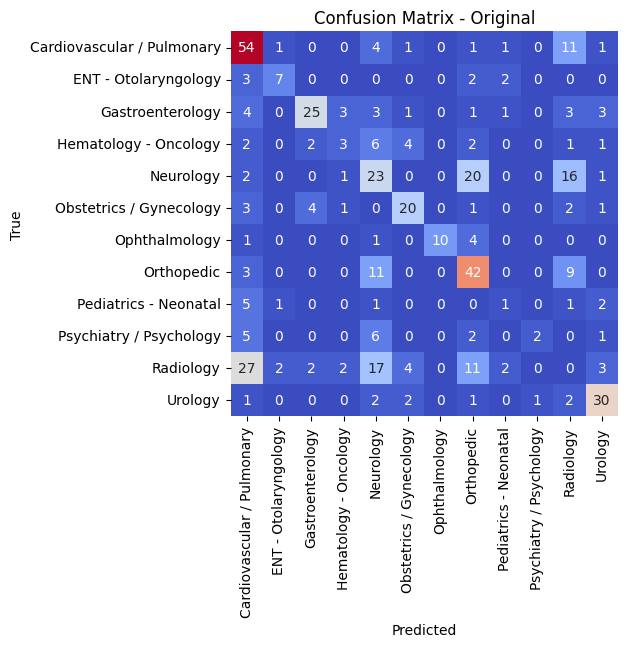

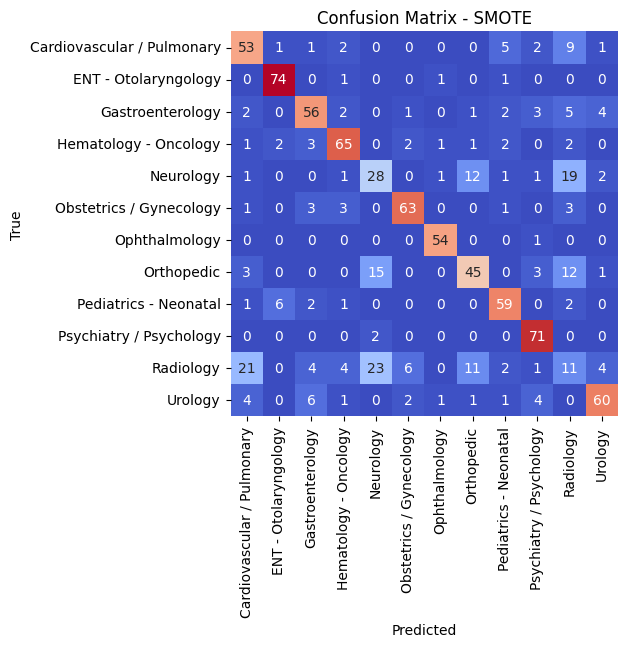

+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
|          Category          | Sampler  |       Accuracy      |      Precision      |        Recall       |       F1 Score      |
+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
| Cardiovascular / Pulmonary | Original |  0.7297297297297297 |  0.7297297297297297 |  0.7297297297297297 |  0.7297297297297297 |
| Cardiovascular / Pulmonary |  SMOTE   |  0.7162162162162162 |  0.7162162162162162 |  0.7162162162162162 |  0.7162162162162162 |
|    ENT - Otolaryngology    | Original |         0.5         |         0.5         |         0.5         |         0.5         |
|    ENT - Otolaryngology    |  SMOTE   |  0.961038961038961  |  0.961038961038961  |  0.961038961038961  |  0.961038961038961  |
|      Gastroenterology      | Original |  0.5681818181818182 |  0.5681818181818182 |  0.5

In [43]:
#Random Forest
plot_metrics_comparison_random_forest(tfIdfMat_reduced, labels, samplers)

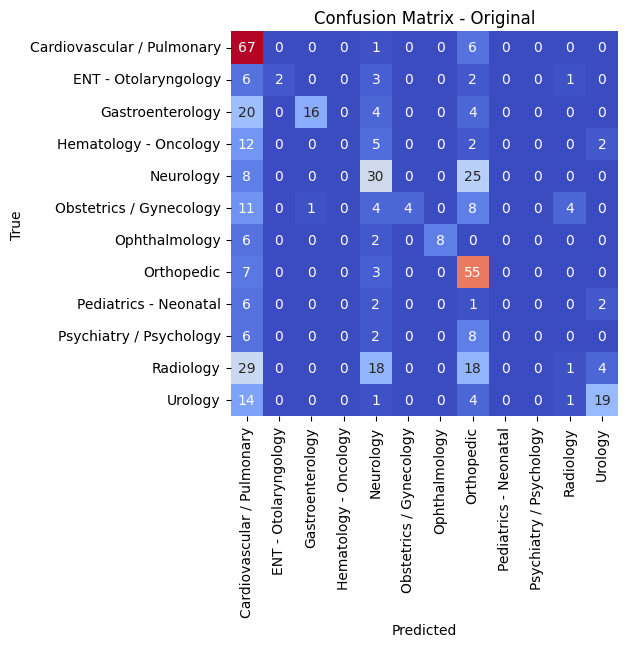

Cross-validation failed for SMOTE: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 898, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1418, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative v

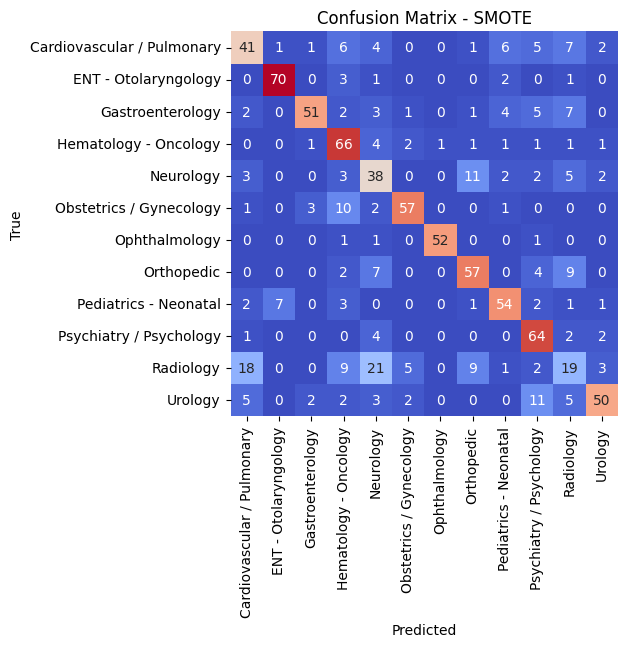

+----------------------------+----------+----------------------+-----------+----------------------+----------------------+
|          Category          | Sampler  |       Accuracy       | Precision |        Recall        |       F1 Score       |
+----------------------------+----------+----------------------+-----------+----------------------+----------------------+
| Cardiovascular / Pulmonary | Original |  0.9054054054054054  |    1.0    |  0.9054054054054054  |  0.9503546099290782  |
| Cardiovascular / Pulmonary |  SMOTE   |  0.5540540540540541  |    1.0    |  0.5540540540540541  |  0.7130434782608697  |
|    ENT - Otolaryngology    | Original | 0.14285714285714285  |    1.0    | 0.14285714285714285  |         0.25         |
|    ENT - Otolaryngology    |  SMOTE   |  0.9090909090909091  |    1.0    |  0.9090909090909091  |  0.9523809523809523  |
|      Gastroenterology      | Original | 0.36363636363636365  |    1.0    | 0.36363636363636365  |  0.5333333333333333  |
|      Gastroent

In [44]:
#Naive Bayes
plot_metrics_comparison_naive_bayes(tfIdfMat_reduced, labels, samplers)

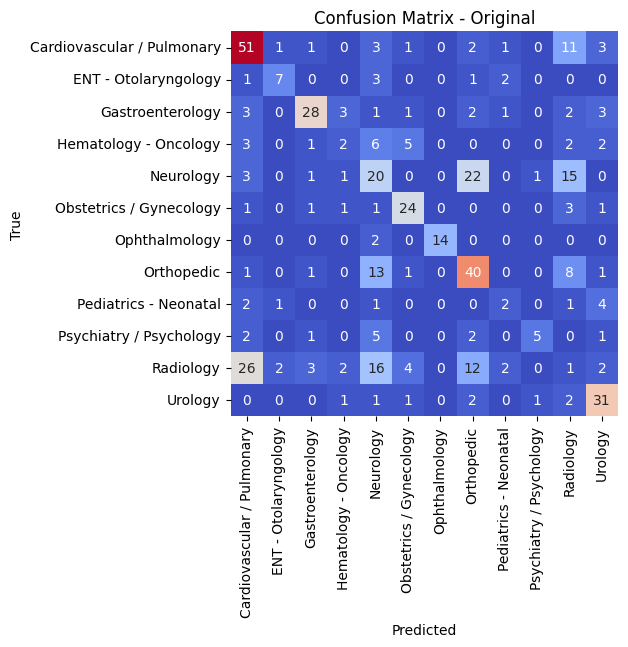

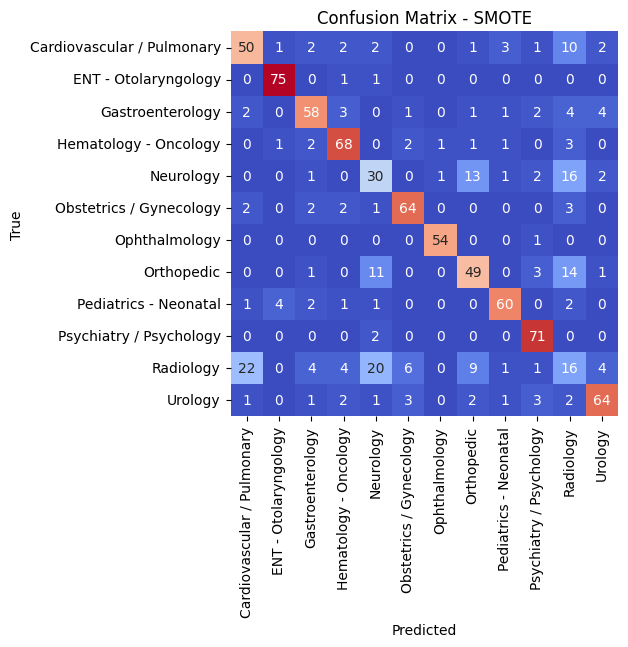

+----------------------------+----------+----------------------+----------------------+----------------------+----------------------+
|          Category          | Sampler  |       Accuracy       |      Precision       |        Recall        |       F1 Score       |
+----------------------------+----------+----------------------+----------------------+----------------------+----------------------+
| Cardiovascular / Pulmonary | Original |  0.6891891891891891  |  0.6891891891891891  |  0.6891891891891891  |  0.6891891891891891  |
| Cardiovascular / Pulmonary |  SMOTE   |  0.6756756756756757  |  0.6756756756756757  |  0.6756756756756757  |  0.6756756756756757  |
|    ENT - Otolaryngology    | Original |         0.5          |         0.5          |         0.5          |         0.5          |
|    ENT - Otolaryngology    |  SMOTE   |  0.974025974025974   |  0.974025974025974   |  0.974025974025974   |  0.974025974025974   |
|      Gastroenterology      | Original |  0.6363636363636364 

In [45]:
#Xgboost
plot_metrics_comparison_xgboost(tfIdfMat_reduced, labels, samplers)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138975
[LightGBM] [Info] Number of data points in the train set: 1859, number of used features: 545
[LightGBM] [Info] Start training from score -1.834062
[LightGBM] [Info] Start training from score -3.121075
[LightGBM] [Info] Start training from score -2.334837
[LightGBM] [Info] Start training from score -3.293687
[LightGBM] [Info] Start training from score -1.990460
[LightGBM] [Info] Start training from score -2.715610
[LightGBM] [Info] Start training from score -3.323101
[LightGBM] [Info] Start training from score -1.857913
[LightGBM] [Info] Start training from score -3.450257
[LightGBM] [Info] Start training from score -3.916876
[LightGBM] [Info] Start training from score -2.214588
[LightGBM] [Info] Start training from score -2.239527
[LightGBM] [Warning] No further splits with positive gain, be

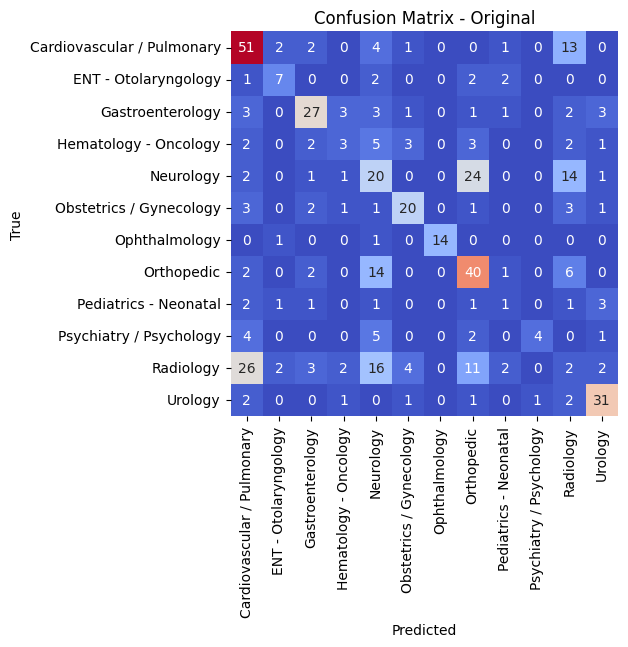

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138975
[LightGBM] [Info] Number of data points in the train set: 3561, number of used features: 545
[LightGBM] [Info] Start training from score -2.484065
[LightGBM] [Info] Start training from score -2.494217
[LightGBM] [Info] Start training from score -2.490821
[LightGBM] [Info] Start training from score -2.501043
[LightGBM] [Info] Start training from score -2.457485
[LightGBM] [Info] Start training from score -2.484065
[LightGBM] [Info] Start training from score -2.422054
[LightGBM] [Info] Start training from score -2.501043
[LightGBM] [Info] Start training from score -2.474014
[LightGBM] [Info] Start training from score -2.480703
[LightGBM] [Info] Start training from score -2.528822
[LightGBM] [Info] Start training from score -2.504473
[LightGBM] [Warning] No further splits with positive gain, be

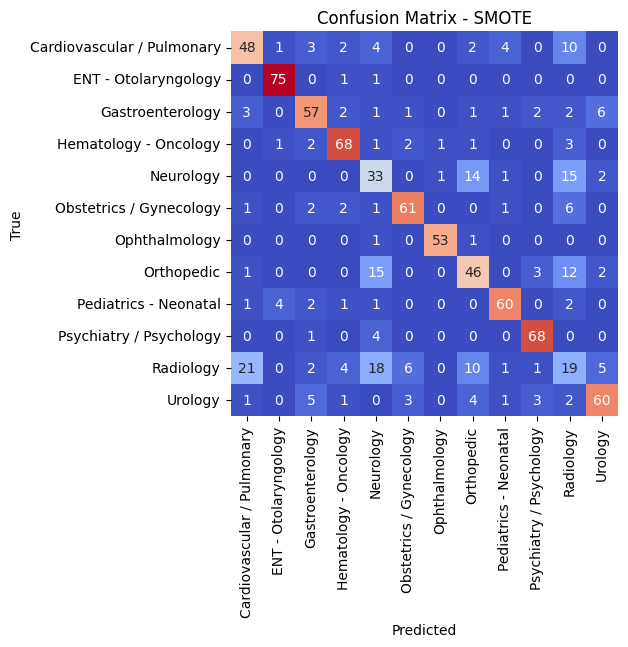

+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
|          Category          | Sampler  |       Accuracy      |      Precision      |        Recall       |       F1 Score      |
+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
| Cardiovascular / Pulmonary | Original |  0.6891891891891891 |  0.6891891891891891 |  0.6891891891891891 |  0.6891891891891891 |
| Cardiovascular / Pulmonary |  SMOTE   |  0.6486486486486487 |  0.6486486486486487 |  0.6486486486486487 |  0.6486486486486487 |
|    ENT - Otolaryngology    | Original |         0.5         |         0.5         |         0.5         |         0.5         |
|    ENT - Otolaryngology    |  SMOTE   |  0.974025974025974  |  0.974025974025974  |  0.974025974025974  |  0.974025974025974  |
|      Gastroenterology      | Original |  0.6136363636363636 |  0.6136363636363636 |  0.6

In [46]:
#lightgbm
plot_metrics_comparison_lightgbm(tfIdfMat_reduced, labels, samplers)

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, concatenate


def create_deep_ensemble_model(input_shape, num_classes):
    # 1D CNN Model
    cnn_model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Flatten()
    ])

    # LSTM Model
    lstm_model = Sequential([
        LSTM(64, input_shape=input_shape),
        Flatten()
    ])

    # Combine both models
    combined_model = concatenate([cnn_model.output, lstm_model.output])

    # Dense layers for classification
    x = Dense(128, activation='relu')(combined_model)
    x = Dense(num_classes, activation='softmax')(x)

    # Final ensemble model
    ensemble_model = Model(inputs=[cnn_model.input, lstm_model.input], outputs=x)

    ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ensemble_model




def plot_metrics_comparison_ensemble(X, y, samplers):
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Label encoding for categorical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    categories = sorted(set(y_encoded))

    metrics_values = {metric: {category: [] for category in categories} for metric in metrics_names}

    # Original dataset
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Prepare data for CNN and LSTM models
    X_train_orig_cnn = X_train_orig.reshape((X_train_orig.shape[0], X_train_orig.shape[1], 1))
    X_test_orig_cnn = X_test_orig.reshape((X_test_orig.shape[0], X_test_orig.shape[1], 1))
    X_train_orig_lstm = X_train_orig.reshape((X_train_orig.shape[0], X_train_orig.shape[1], 1))
    X_test_orig_lstm = X_test_orig.reshape((X_test_orig.shape[0], X_test_orig.shape[1], 1))

    # Create ensemble model for the original dataset
    ensemble_model_orig = create_deep_ensemble_model((X_train_orig_cnn.shape[1], 1), len(set(y_encoded)))

    # Train ensemble model on the original dataset
    ensemble_model_orig.fit([X_train_orig_cnn, X_train_orig_lstm], y_train_orig, epochs=10, batch_size=32, verbose=0)

    # Predict using ensemble model on the original dataset
    y_pred_orig = ensemble_model_orig.predict([X_test_orig_cnn, X_test_orig_lstm])
    y_pred_orig_classes = tf.argmax(y_pred_orig, axis=1)

    for category in categories:
        category_mask = y_test_orig == category
        y_pred_category = y_pred_orig_classes[category_mask]

        accuracy_orig = accuracy_score(y_test_orig[category_mask], y_pred_category)
        precision_orig = precision_score(y_test_orig[category_mask], y_pred_category, average='micro')
        recall_orig = recall_score(y_test_orig[category_mask], y_pred_category, average='micro')
        f1_orig = f1_score(y_test_orig[category_mask], y_pred_category, average='micro')

        metrics_values['Accuracy'][category].append(accuracy_orig)
        metrics_values['Precision'][category].append(precision_orig)
        metrics_values['Recall'][category].append(recall_orig)
        metrics_values['F1 Score'][category].append(f1_orig)

    category_names = label_encoder.inverse_transform(categories)

    # Confusion Matrix for Original dataset
    cm_orig = confusion_matrix(y_test_orig, y_pred_orig_classes)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
    plt.title('Confusion Matrix - Original')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    for sampler in samplers:
        X_resampled, y_resampled = sampler.fit_resample(X, y_encoded)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Prepare data for CNN and LSTM models
        X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Create ensemble model for the resampled dataset
        ensemble_model = create_deep_ensemble_model((X_train_cnn.shape[1], 1), len(set(y_encoded)))

        # Train ensemble model on the resampled dataset
        ensemble_model.fit([X_train_cnn, X_train_lstm], y_train, epochs=10, batch_size=32, verbose=0)

        # Predict using ensemble model on the resampled dataset
        y_pred = ensemble_model.predict([X_test_cnn, X_test_lstm])
        y_pred_classes = tf.argmax(y_pred, axis=1)

        for category in categories:
            category_mask = y_test == category
            y_pred_category = y_pred_classes[category_mask]

            accuracy = accuracy_score(y_test[category_mask], y_pred_category)
            precision = precision_score(y_test[category_mask], y_pred_category, average='micro')
            recall = recall_score(y_test[category_mask], y_pred_category, average='micro')
            f1 = f1_score(y_test[category_mask], y_pred_category, average='micro')

            metrics_values['Accuracy'][category].append(accuracy)
            metrics_values['Precision'][category].append(precision)
            metrics_values['Recall'][category].append(recall)
            metrics_values['F1 Score'][category].append(f1)

        # Confusion Matrix for Resampled dataset
        cm_resampled = confusion_matrix(y_test, y_pred_classes)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=category_names, yticklabels=category_names)
        plt.title(f'Confusion Matrix - {sampler.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ['Category', 'Sampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    for category in categories:
        for sampler, accuracy, precision, recall, f1 in zip(['Original'] + [sampler.__class__.__name__ for sampler in samplers],
                                                          metrics_values['Accuracy'][category], metrics_values['Precision'][category],
                                                          metrics_values['Recall'][category], metrics_values['F1 Score'][category]):
            table.add_row([label_encoder.inverse_transform([category])[0], sampler, accuracy, precision, recall, f1])

    print(table)

15/15 [==============================] - 2s 102ms/step


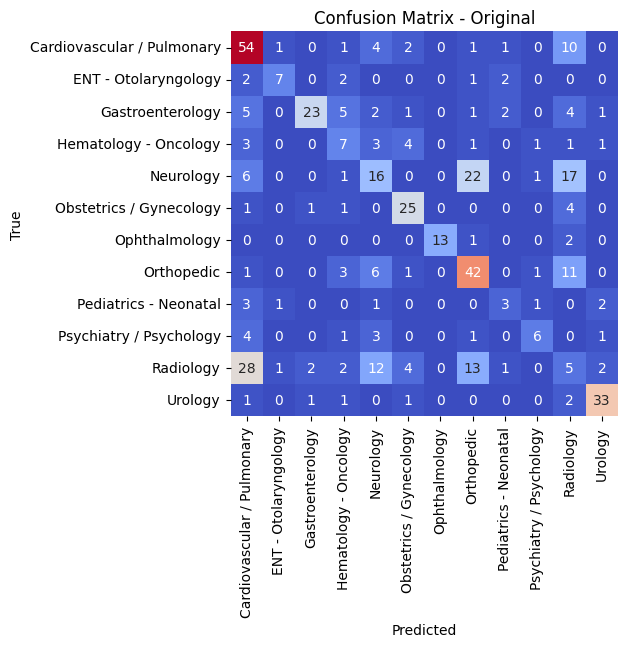

28/28 [==============================] - 3s 100ms/step


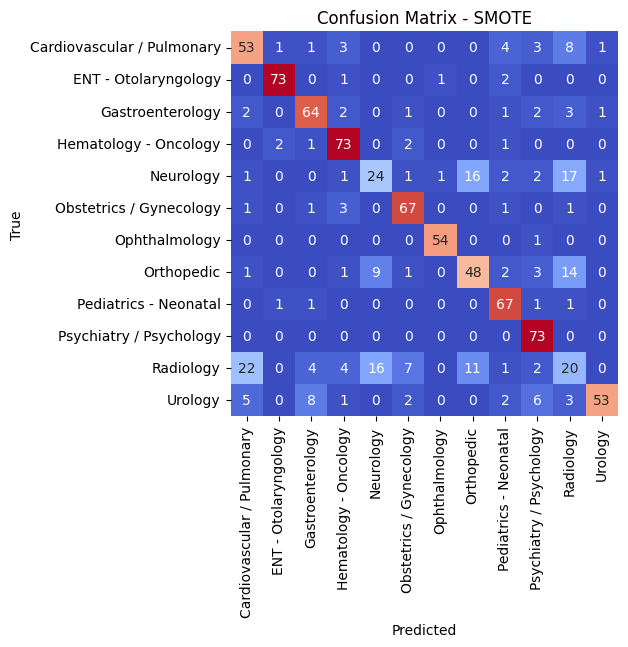

+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
|          Category          | Sampler  |       Accuracy      |      Precision      |        Recall       |       F1 Score      |
+----------------------------+----------+---------------------+---------------------+---------------------+---------------------+
| Cardiovascular / Pulmonary | Original |  0.7297297297297297 |  0.7297297297297297 |  0.7297297297297297 |  0.7297297297297297 |
| Cardiovascular / Pulmonary |  SMOTE   |  0.7162162162162162 |  0.7162162162162162 |  0.7162162162162162 |  0.7162162162162162 |
|    ENT - Otolaryngology    | Original |         0.5         |         0.5         |         0.5         |         0.5         |
|    ENT - Otolaryngology    |  SMOTE   |  0.948051948051948  |  0.948051948051948  |  0.948051948051948  |  0.948051948051948  |
|      Gastroenterology      | Original |  0.5227272727272727 |  0.5227272727272727 |  0.5

In [48]:
plot_metrics_comparison_ensemble(tfIdfMat_reduced, labels, samplers)